This is a program to generate a masks on a per-particle basis that are optimize to minimize the membrane for each particle. This is the preliminary program to identify the plane that bisects the two vesicles by searching for a minimum pixel intensity. It requires that all interfaces are aligned to a single 3d class (i.e. aligned to eachother). Then the steps are as follows:
Reorient to the origin xyz, by calculating and applying inverse rotations from the starfile. 

In [185]:
import numpy as np
import mrcfile
from scipy.ndimage import rotate, shift
import argparse
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

Here we make the mask. 

In [188]:
def make_mask(
z_thickness, 
z_offset):
    rot = 0
    tilt = 0
    psi = 0
    
    #====Make the mask
    box_size = 256
    mask = np.ones((box_size, box_size, box_size), dtype=np.uint8)
    
    #====Cut out the center wedge
    z_center = (box_size - z_thickness) // 2
    z_start = z_center - z_offset
    z_end = z_start + z_thickness
    xy_start = z_center
    xy_end = xy_start + z_thickness
    
    mask[z_start:z_end, xy_start:xy_end, xy_start:xy_end] = 0
    
    #======Perform rotations=======
    rot1 = rotate(mask, angle=-rot, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)
    rot2 = rotate(rot1, angle=-tilt, axes=(0,2), reshape=False, order=1, mode='constant', cval=0.0)
    rot3 = rotate(rot2, angle=-psi, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)\
    
    
    #======Re-Binerize the mask=====
    binary_mask = (rot3 >= 0.5).astype(np.uint8)
    
    #======Write out mask=======
    with mrcfile.new(f"./binary_mask_{z_thickness}_{z_offset}.mrc", overwrite=True) as out_mrc:
        out_mrc.set_data(binary_mask)
        out_mrc.voxel_size = (2.62, 2.62, 2.62)

In [192]:
with mrcfile.open('/Volumes/atbimac23-RAID/TomoPicking/Examples/job1866_25x40_vtm8_edge3/filtered/SV4_003_dff000001_wiener.mrc', permissive=True) as mrc:
        data = mrc.data.copy()
        
rot = 157.29
tilt = 126.929
psi = 173.776
x0, y0, z0 = 128, 128, 128
radius = 100

rot1 = rotate(data, angle=-rot, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)
rot2 = rotate(rot1, angle=-tilt, axes=(0,2), reshape=False, order=1, mode='constant', cval=0.0)
rot3 = rotate(rot2, angle=-psi, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)

arot, atilt, apsi = -139.89795, 128.307364, 177.726862

arot1 = rotate(data, angle=-arot, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)
arot2 = rotate(arot1, angle=-atilt, axes=(0,2), reshape=False, order=1, mode='constant', cval=0.0)
arot3 = rotate(arot2, angle=-apsi, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)

mrot, mtilt, mpsi = 0, 0, 90

mrot1 = rotate(data, angle=-arot, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)
mrot2 = rotate(mrot1, angle=-atilt, axes=(0,2), reshape=False, order=1, mode='constant', cval=0.0)
mrot3 = rotate(mrot2, angle=-apsi, axes=(1,2), reshape=False, order=1, mode='constant', cval=0.0)

slice_2dx = rot3[z0 - radius:z0 + radius + 1, y0 - radius:y0 + radius + 1, x0]
slice_2dy = rot3[z0 - radius:z0 + radius + 1, y0, x0 - radius:x0 + radius + 1]
slice_2dz = rot3[z0, y0 - radius:y0 + radius + 1, x0 - radius:x0 + radius + 1]

mslice_2dx = mrot3[z0 - radius:z0 + radius + 1, y0 - radius:y0 + radius + 1, x0]
mslice_2dy = mrot3[z0 - radius:z0 + radius + 1, y0, x0 - radius:x0 + radius + 1]
mslice_2dz = mrot3[z0, y0 - radius:y0 + radius + 1, x0 - radius:x0 + radius + 1]

relion_rotation = R.from_euler('ZYZ', [rot, tilt, psi], degrees=True)

inverse_rotation = relion_rotation.inv()

chimera_angles = inverse_rotation.as_euler('XYZ', degrees=True)
print(rot)
print("ChimeraX rotation (XYZ extrinsic degrees):", chimera_angles)

157.29
ChimeraX rotation (XYZ extrinsic degrees): [-171.79203295   52.62398578 -167.57801872]


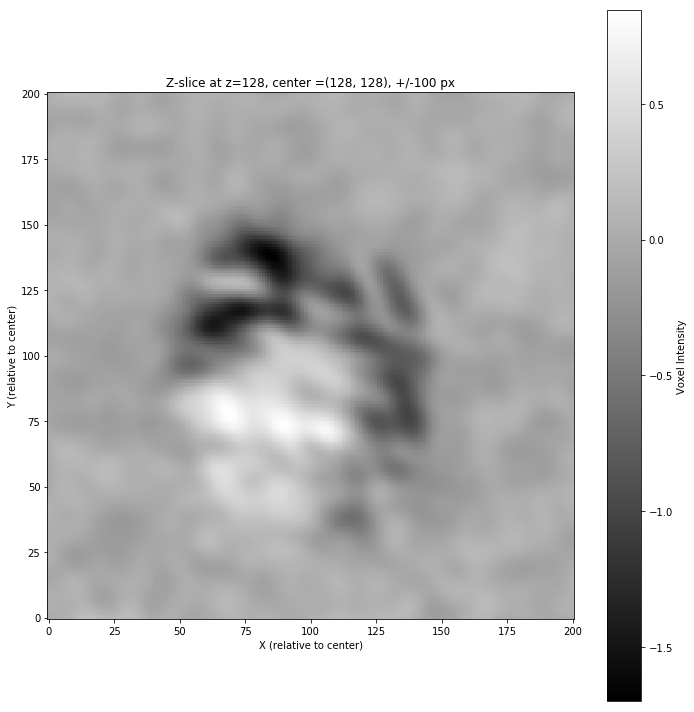

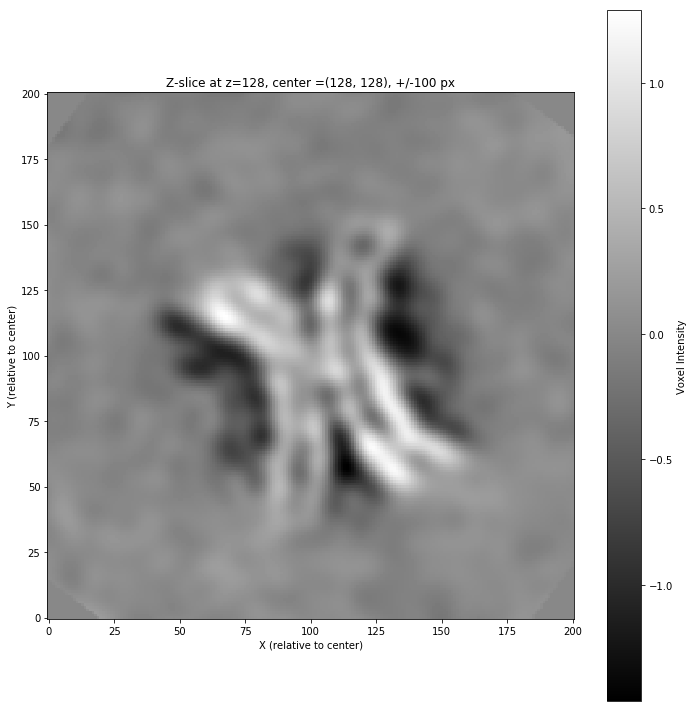

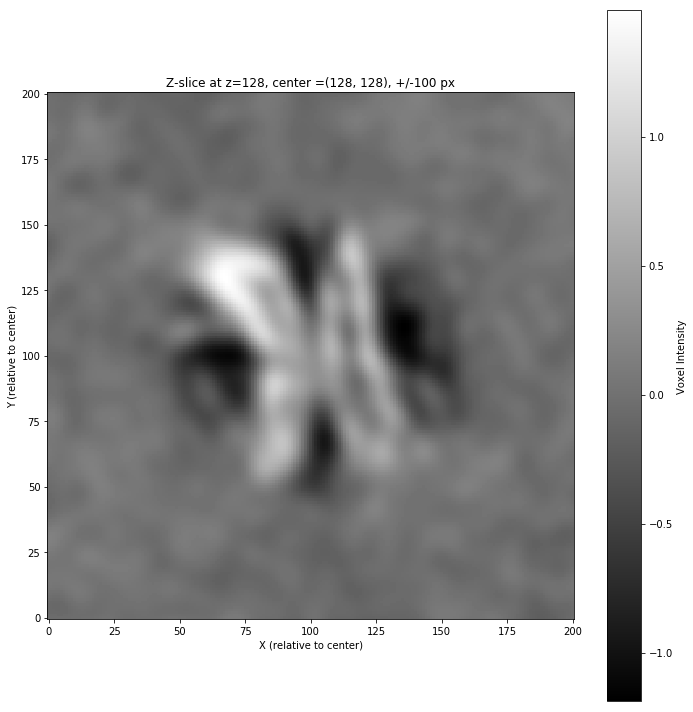

In [193]:
plt.figure(figsize=(10,10))
plt.imshow(slice_2dx, cmap='gray', origin='lower')
plt.title(f"Z-slice at z={z0}, center =({x0}, {y0}), +/-{radius} px")
plt.colorbar(label="Voxel Intensity")
plt.xlabel("X (relative to center)")
plt.ylabel("Y (relative to center)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(slice_2dy, cmap='gray', origin='lower')
plt.title(f"Z-slice at z={z0}, center =({x0}, {y0}), +/-{radius} px")
plt.colorbar(label="Voxel Intensity")
plt.xlabel("X (relative to center)")
plt.ylabel("Y (relative to center)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(slice_2dz, cmap='gray', origin='lower')
plt.title(f"Z-slice at z={z0}, center =({x0}, {y0}), +/-{radius} px")
plt.colorbar(label="Voxel Intensity")
plt.xlabel("X (relative to center)")
plt.ylabel("Y (relative to center)")
plt.tight_layout()
plt.show()

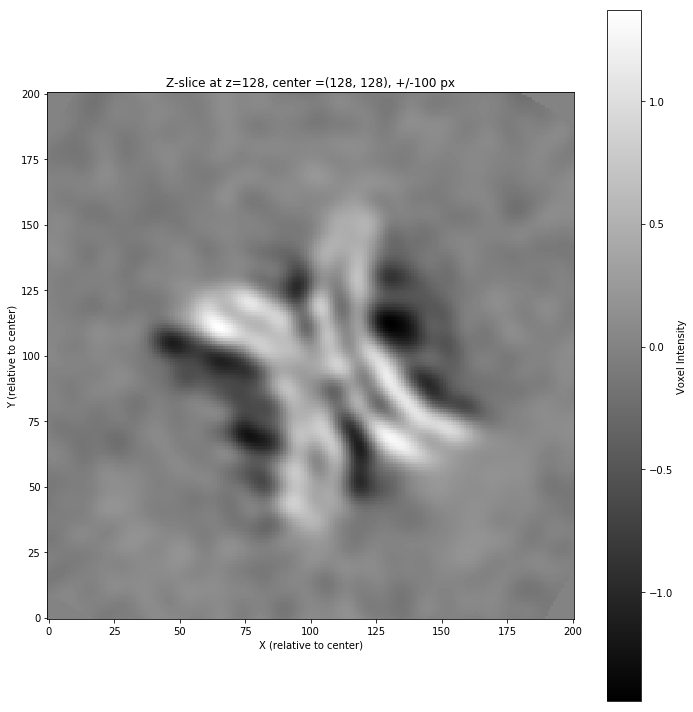

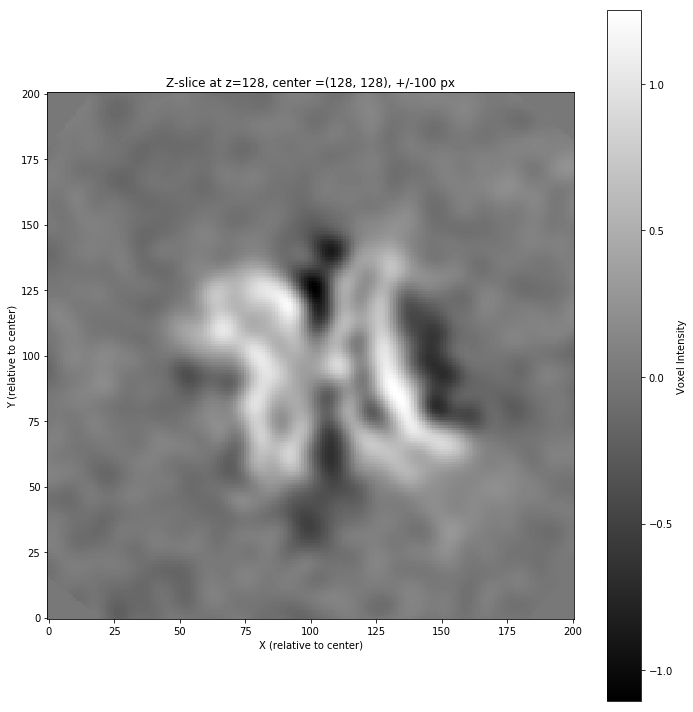

In [133]:
plt.figure(figsize=(10,10))
plt.imshow(slice_2dy, cmap='gray', origin='lower')
plt.title(f"Z-slice at z={z0}, center =({x0}, {y0}), +/-{radius} px")
plt.colorbar(label="Voxel Intensity")
plt.xlabel("X (relative to center)")
plt.ylabel("Y (relative to center)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(mslice_2dy, cmap='gray', origin='lower')
plt.title(f"Z-slice at z={z0}, center =({x0}, {y0}), +/-{radius} px")
plt.colorbar(label="Voxel Intensity")
plt.xlabel("X (relative to center)")
plt.ylabel("Y (relative to center)")
plt.tight_layout()
plt.show()